# Unstructured Data Analytics 

Team: Iris Wang, Gowtami Khambhampati, Alyssa Bae, Kevin McKinney, Shreya Bakshi, Rick Kim, Rathi Kannan



# **Scraper: Fetching 5000 posts from Edmunds.**
Link: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p%7B%7D


In [3]:
# Use this code if using Colab to run Selenium

# Make sure to go to Runtime -> Change runtime and set GPU as hardware accelerator

# !kill -9 -1 # Use this line to delete this VM and start a new one. 
# The above line deletes all files and folders from the current VM and allocates a new one.

#Selenium is an open-source tool that automates web browsers.
!pip install selenium
!apt-get -q update   #Used to handle installation and removal of softwares and libraries
!apt install -yq chromium-chromedriver #ChromeDriver is a separate executable that Selenium WebDriver uses to control Chrome.
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver 
#WebDriver is a browser automation framework that works with open source APIs. 
#The framework operates by accepting commands, sending those commands to a browser, and interacting with applications.
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

  Using cached selenium-3.141.0-py2.py3-none-any.whl (904 kB)
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:13 http://security.ubuntu.com/ubuntu b

In [4]:
# Setting web driver
wd = webdriver.Chrome('chromedriver',options=chrome_options)


In [5]:
import pandas as pd

# Variables 
page_num = 0
total_comment_count = 5000
count = 0
comments = pd.DataFrame(columns = ['Date','user_id','comments'])

# Iterating through Pages (50 comments per page)
while count < total_comment_count:

  # Fetching routes 
  route = 'https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p{}'.format(page_num) # setting page
  wd.get(route)

  # Getting ids  
  comment_ids = []
  ids = wd.find_elements_by_xpath("//*[contains(@id,'Comment_')]")

  # Storing ids
  for i in ids:
    comment_ids.append(i.get_attribute('id'))

  # Looping through the page
  for x in comment_ids:
      #Extract dates from for each user on a page
      user_date = wd.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[2]/div[2]/span[1]/a/time')[0]
      date = user_date.get_attribute('title')

      #Extract user ids from each user on a page
      userid_element = wd.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[2]/div[1]/span[1]/a[2]')[0]
      userid = userid_element.text

      #Extract Message for each user on a page
      user_message = wd.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[3]/div/div[1]')[0]

      # Removes blockquote from text
      quote = user_message.find_elements_by_tag_name('blockquote')

      if len(quote) > 0:
        quote_text = quote[0].text
        comment = user_message.text
        comment = comment.replace(quote_text,'')
      
      else:
        comment = user_message.text
                                    
      #Adding date, userid and comment for each user in a dataframe    
      comments.loc[len(comments)] = [date,userid,comment]
      count +=1 

  # Moving onto the next page
  page_num += 1
 # print(count)

# Final output
print(comments)
print(comments.shape[0])
print('Final: ' + str(count))

#count_volvo = 0
#for i in range((comments.shape[0])): 
#  if ('Volvo' in comments.loc[i,'comments']) | ('volvo' in comments.loc[i,'comments']) :
#      count_volvo += 1



                          Date  ...                                           comments
0       March 24, 2002 10:54PM  ...  I personally think that with a few tweaks the ...
1       March 25, 2002 12:06AM  ...  I am debating a new purchase and these two are...
2       March 25, 2002 10:02AM  ...  Great handling, RWD, excellent engine and the ...
3        March 25, 2002 4:04PM  ...  And no manual tranny. That may not matter to y...
4        March 25, 2002 5:44PM  ...  One beauty of BMW 3 Series is that there are s...
...                        ...  ...                                                ...
4995   January 16, 2006 8:09PM  ...  "...I really would like more interior niceties...
4996  January 16, 2006 10:26PM  ...  More and more car makers are supporting iPod i...
4997   January 17, 2006 8:26AM  ...  Regarding the comment about the security syste...
4998   January 17, 2006 8:52AM  ...  "If they really want to steal the car, then BM...
4999   January 17, 2006 9:00AM  ...  If I'm

In [6]:
# Saving to CSV

comments.to_csv("edmunds_5000_comments.csv", sep="\t")
!ls
from google.colab import files
files.download("edmunds_5000_comments.csv")

edmunds_5000_comments.csv  sample_data


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Task A: Test if the data support Zipf’s law**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import Counter, OrderedDict
import nltk
from nltk.corpus import stopwords

In [8]:
# run this cell to upload files.  
from google.colab import files
uploaded = files.upload()

Saving edmunds_5000_comments.csv to edmunds_5000_comments (1).csv


In [9]:
# get edmunds comment file into a dataframe
edmunds_data = pd.read_csv("edmunds_5000_comments.csv",sep='\t', index_col=0)
df = pd.DataFrame(edmunds_data) 
df

,Date,user_id,comments
0,"March 24, 2002 10:54PM",merc1,I personally think that with a few tweaks the ...
1,"March 25, 2002 12:06AM",fredvh,I am debating a new purchase and these two are...
2,"March 25, 2002 10:02AM",blueguydotcom,"Great handling, RWD, excellent engine and the ..."
3,"March 25, 2002 4:04PM",hungrywhale,And no manual tranny. That may not matter to y...
4,"March 25, 2002 5:44PM",riez,One beauty of BMW 3 Series is that there are s...
...,...,...,...
4995,"January 16, 2006 8:09PM",shipo,"""...I really would like more interior niceties..."
4996,"January 16, 2006 10:26PM",wco81,More and more car makers are supporting iPod i...
4997,"January 17, 2006 8:26AM",bdr127,Regarding the comment about the security syste...
4998,"January 17, 2006 8:52AM",shipo,"""If they really want to steal the car, then BM..."


In [10]:
# get stopwords from nltk library
nltk.download('stopwords')
stopword = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# create a dictionary of words and their frequency. exclude stopwords.
word_dictionary = Counter()
all_words = []
word_dict = Counter()
def convert_func(comments):
    for line in comments:
        line = " ".join(str(x) for x in line).replace('(', '').replace(')', '') 
        all_words.extend(re.sub(r'[^a-zA-Z0-9-]', ' ', line).split())
        word_dict.update(Counter(all_words))
    return word_dict
 
        
convert_func(df.values)


In [ ]:
top_100 = word_dict.most_common(100)
#print(top_100)

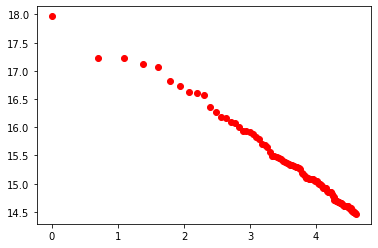

In [ ]:
# Plot the most common 100 words in the data against the theoretical prediction of the law.
import math
import matplotlib

logInds = []
logCounts = []
rank_word_count = []

for (ind, (word, count)) in enumerate(top_100):
    ind = ind+1
    rank_word_count.append((ind,word,count))
    logInds.append(math.log(ind))
    logCounts.append(math.log(count))

plt.plot(logInds,logCounts,'ro')

In [ ]:
 # test if the data support Zipf’s law 
 # Note how when we move by approximately 3x rank, the frequency goes down by about 1/3 thus proving the data supports Zipf's law
print(rank_word_count[10])
print(rank_word_count[30])
print(rank_word_count[90])
 

(11, 'you', 12789434)
(31, 'was', 5132453)
(91, 'other', 2134995)


In [ ]:
# test if the data support Zipf’s law - using linear regression - expected result: b1 is close to -1.0

import sklearn as sklearn
from sklearn import linear_model
 
X = np.c_[logInds]
y = np.c_[logCounts]

model = linear_model.LinearRegression()
model.fit(X,y)
b0, b1 = model.intercept_[0], model.coef_[0][0]
b0,b1
                           

(18.23436554901975, -0.8074143584680389)

# **Task B: Find the top 10 brands from frequency count**

In [1]:
# run this cell to download files. car models and edmunds comment files are already uploaded
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
# #replace model with brand
# car_data = pd.read_csv('car models brands.csv')
# car_data

# car_brand = car_data['Brand'].to_list()
# car_model = car_data['Model'].to_list()

# size = len(car_model)
# car_dict = {}

# for i in range(size):
#   car_dict[car_model[i]] = car_brand[i]

# for word in all_words:
#   if word in car_dict:
#     word = car_dict[word]


In [ ]:
car_data = pd.read_csv("car models brands.csv", header=None, names=['Brand','Model'])

car_data = car_data[car_data["Brand"].str.contains("car|problem|seat|sedan")==False]
print(car_data)
models_list = car_data['Model'].tolist()

In [ ]:
import nltk 
nltk.download('punkt')

df.dropna(inplace=True)

df['t'] = df['comments'].apply(nltk.tokenize.word_tokenize)

In [ ]:
def token_cleaner(row):
    clean_tokens = []
    list_row = list(row) #Set --> List
    for word in list_row:
        word = word.lower()
        if word in models_list: #Change any models that appear to their corresponding Brands
            word = car_data['Brand'][car_data['Model']==word].tolist()[0]
            if word not in clean_tokens:
                clean_tokens.append(word.lower())
        else: 
            if word not in clean_tokens: 
                clean_tokens.append(word.lower())
    clean_tokens = [x.lower() for x in clean_tokens]
    return clean_tokens

df['t'] = df['t'].apply(token_cleaner)
# print(comments['Tokens'][0:10])


In [ ]:
cars_dict = dict()

for row in df['t']:
    list_row = list(row) #Set --> List
    for word in row:
        word = word.lower() #Remove any capitalization
        if word in models_list: #Change any models that appear to their corresponding Brands
            word = car_data['Brand'][car_data['Model']==word].tolist()[0]
        if word in cars_dict:
            cars_dict[word] += 1
        else:
            cars_dict[word] = 1

In [ ]:
top_makes = dict()

for i in cars_dict: 
    if i in list(set(car_data['Brand'])):
        top_makes[i] = cars_dict[i]

k = Counter(top_makes) 
high = k.most_common(10) 

top_brands = []
for i in high:
    top_brands.append(i[0])

df_freq = pd.DataFrame(index=top_brands, columns=['Frequency'])

for i in range(0,len(high)):
    df_freq['Frequency'][i] = high[i][1]

print('Brands with Highest Frequency:')
display(df_freq)

#  **Task C: Calculate lift ratios**  

In [ ]:
import itertools
top_brand_combos = list(itertools.combinations(top_brands,2))
print(top_brand_combos)

In [ ]:
#Define a function that will calculate Lift
def liftCalc(word1,word2):
    w1freq = sum(df.apply(lambda x: word1 in x['t'], axis=1))
    w2freq = sum(df.apply(lambda x: word2 in x['t'], axis=1))
    bothfreq = sum(df.apply(lambda x: word1 in x['t'] and word2 in x['t'], axis=1))
    return float(bothfreq/len(df))/((float(w1freq)/len(df))*(float(w2freq)/len(df)))

In [ ]:
#Initialize empty dictionary for lift values
brand_lifts = dict()

#iterate over brand combinations, calculate lift, save to dictionary
for i in range(0,len(top_brand_combos)): 
    a,b = top_brand_combos[i]
    brands = (a,b)
    lift = liftCalc(a,b)
    brand_lifts[brands] = lift

In [ ]:
df_lifts = pd.DataFrame(columns=top_brands,index=top_brands)
for brand in top_brands: 
    df_lifts[brand][brand] = '-'
for brands in brand_lifts:
    a,b = brands
    df_lifts[a][b] = '-'
    df_lifts[b][a] = (brand_lifts[brands])

In [ ]:
#Lift values for brands
df_lifts

In [ ]:
d = Counter(brand_lifts)

print('Brand Combinations With Highest Lift:')
for k, v in d.most_common(10):
    print('%s: %.6f' % (k, v))

In [ ]:
print( 'Brand Combinations With Lowest Lift:')
for k, v in d.most_common()[-11:-1]:
    print('%s: %.6f' % (k, v))

# **Task D: Show the brands on a multi-dimensional scaling (MDS) map**

In [ ]:
top_brand_lifts = pd.DataFrame(columns=top_brands,index=top_brands)

In [ ]:
for brands in brand_lifts:
    a,b = brands
    top_brand_lifts[a][b] = (1/brand_lifts[brands])
    top_brand_lifts[b][a] = (1/brand_lifts[brands])

In [ ]:
for brand in top_brands: 
    top_brand_lifts[brand][brand] = 0

In [ ]:
top_brand_lifts

In [ ]:
from sklearn import manifold
from sklearn.manifold import MDS

mds = manifold.MDS(dissimilarity='euclidean')
mds_fit = mds.fit(top_brand_lifts)
coords = mds.fit_transform(top_brand_lifts)

In [ ]:
x,y = coords.T

plt.figure(figsize=(10, 10))
plt.scatter(x,y,c='coral')

for i, txt in enumerate(top_brands):
    plt.annotate(txt, (x[i], y[i]), xycoords='data',
             xytext=(20, -20), textcoords='offset points',
             size=14, ha='right', va="center",
             bbox=dict(boxstyle="Sawtooth",color='yellow' ,alpha=0.5),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1))
    
plt.yticks([])
plt.xticks([])
plt.title('Multidimensional-Scaling:- Topmost 10 Brands \n (Euclidean Distances = 1 / lift)')
plt.show()

Finding the **Aspirational** Brands

In [ ]:
aspiration_comments = pd.read_csv("edmunds_5000_comments.csv",sep='\t', index_col=0)
aspiration_comments.dropna(inplace=True)
aspiration_comments['Tokens2'] = aspiration_comments['comments'].apply(nltk.tokenize.word_tokenize)

In [ ]:
def lower_func(row):
    list_row = list(row)
    token=[]
    for word in list_row:
        word=word.lower()
        if word in models_list: #Change any models that appear to their corresponding Brands
            word = car_data['Brand'][car_data['Model']==word].tolist()[0]
            if word not in token:
                token.append(word) 
        else: 
                token.append(word) 
    return token

aspiration_comments['Tokens2'] = aspiration_comments['Tokens2'].apply(lower_func)

#print(aspiration_comments)

In [ ]:
def attach_together(token_list):
    r=''
    for each in token_list:
        r=r+'' + each + ' '
    return r

aspiration_comments['Attached_Tokens'] = aspiration_comments['Tokens2'].apply(attach_together)
#print(aspiration_comments)

In [ ]:
#car_data ##= pd.read_csv(r"C:\Users\palla\Downloads\car models brands.csv", header=None, names=['Brand','Model'])
aspirations=['love to own','cannot wait to buy','looking forward to buy','desire to buy','fancy car','eager to buy','would like to buy','dream car','really want','future car','dream of','cant wait to buy','would love to buy','wish to buy','want to buy','aspire to','thinking to buy','love to buy','want to own','like to own','have to own','nice to own','nice to buy','have to buy','would love to buy','would like to buy','wish to own','looking to buy']
unique_brands=list(set(car_data.Brand.values))
#print(unique_brands)

In [ ]:
#Define a function that will calculate Lift based on new tokens
def liftCalc_aspiration(word_1,word_2):
  
    w1freq = sum(aspiration_comments.apply(lambda x: word_1 in x.Attached_Tokens_Tokenized, axis=1))
    w2freq = sum(aspiration_comments.apply(lambda x: word_2 in x.Attached_Tokens_Tokenized, axis=1))
    bothfreq = sum(aspiration_comments.apply(lambda x: word_1 in x.Attached_Tokens_Tokenized and word_2 in x.Attached_Tokens_Tokenized, axis=1))
    try:
        return float(bothfreq/len(aspiration_comments))/((float(w1freq)/len(aspiration_comments))*(float(w2freq)/len(aspiration_comments)))
    except:
        return 0

In [ ]:
def find_aspirations(each_at):
  

    for each_aspiration in aspirations:
        if each_aspiration in each_at:
            for brand in unique_brands:
                if brand in each_at:
                    each_at=each_at.replace(each_aspiration,'aspirations_find_out')          
                    #print(brand,each_aspiration) 
    return each_at

aspiration_comments.Attached_Tokens=aspiration_comments.Attached_Tokens.apply(find_aspirations)
aspiration_comments['Attached_Tokens_Tokenized']=aspiration_comments.Attached_Tokens.apply(nltk.tokenize.word_tokenize)
#print(aspiration_comments)
#print(each_at)

#**Task H: Most Aspirational Brands with the lift values**

In [ ]:
import operator
d = {} 
for brand in unique_brands:
    lift=liftCalc_aspiration(brand,'aspirations_find_out')
    if lift>0:
        d[brand]=lift
        #print(d)
sorted_d= sorted(d.items(), key=operator.itemgetter(1),reverse=True)

df_aspiration = pd.DataFrame(sorted_d,columns=['Brand','Lift'])

#print('\n \033[1m' + 'BMW is the "Most Aspirational" Brand ' + '\033[0m')
print('\n Brands and Lift Values:')
display(df_aspiration)

1. Which forum you chose (provide URL) 

* https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p%7B%7D

2. Which 10 brands you chose – provide the frequency table

* The 10 brands that we chose are bmw, acura, audi, honda, infiniti,
nissan, mercedes benz, toyota,subaru, and volkswagen

* See the code above for the frequency table

3. Show all lift calculations in a table.

* see the code above

4. MDS map

* see the code and map above

5. State the 5 attributes you chose (again, a table is good here)

6. For task E, provide all details of your analysis – e.g., how you measured “aspirational” and how you found the most aspirational brand.

* When looking at the lift values from car brands, you can determine which car brands are most often compared to each other, in order to get insights on who are their main competitors. As lift values decrease, the stronger the association is between the two brands. The strongest brand association was between Volkswagen and Audi. This may be due to the fact that Audi is the luxury car brand owned by the Volkswagen Group. In addition, other brands with strong associations were with Toyota, Nissan, and Honda. All three of these cars are produced by Japanese automobile manufactures, and are among the most popular cars purchased in America and the rest of the world. These three brands all compete with each in the affordable car market, especially in the United States. Therefore, you would expect there to be many comparisons between these three car brands. Something I did not expect was for the brand association between BMW and Mercedes to be so low. When looking at entry level luxury car brands, BMW and Mercedes are often the two of the most popular car brands when talking about luxury, especially due to the fact that they are both produced by German car manufactures. In fact, there seemed to be not any significant associations between any car brands with BMW. This could mean that people who purchase BMWs are loyal and are unlikely to switch to another brand. 

7. Advice/insights based on your analysis for your client.

# **Task G: Analysis of Aspirational Brands**

One could tell at first glance that when consumers are buying and discussing entry-level luxury cars, they mainly mention Japanese and European car brands, rather than American domestic automakers.
The first 5 of the top 10 aspirational brands are mainly Japanese automakers, except the third place is Volvo. We believe that it’s mainly because the global reorganization of Japanese luxurious car brands like Lexus, Infiniti which started selling vehicles in North America since end 80s.

**price**

It’s worth to notice that MAZDA on the top place of aspirational brands, instead of BMW, Audi are mentioned a lot from out top scraping and brands lift. According to our further research, it’s mainly because the entry-level roadster produced by Mazda costs less than $30,000.

Mazda MX-5 MIATA starts from 25,830 dollars and MIATA RF starts from 33,000 Dollars, with sleek and stylish exterior the price is almost invincible. BMW’s roadster is double the price.

It happens that there is a similar case: No.2 in the list is Mitsubishi, crossovers start from 20,000 usd, luxurious Mitsubishi crossover is within 30,000 usd. Toyota in the list is because Lexus, Lexus IS and ES series are always on the all kind of top 10 entry level luxury cars rankings. Lexus IS starts from 39,050 usd. Infiniti, a brand from Nissan family, the famous Q50 starts from more affordable price 36,700 usd. Q50 also famous on its twin-turbo charged engine and roomy comfortable seating plus good safety score too. Compare to Mercedes Benz C -Class starting price 42,650 usd, Audi A4 starting price is 40,145 usd and BMW 3 Series which starts from 42,245 usd that entry level Lexus and Infiniti have great price advance.







**maintenance cost**

Affordable maintenance and repairs price is very import for entry level car buyers. 
PepcriPal ranked Lexus in 6th place overall for its low ownership costs. It’s reported about 551 usd per year. However, on average, BMW owners can expect to pay between 150 usd to 400 usd per service every 10,000 miles. A major service can cost 1,000 usd to 3,000 usd or more. At the end of the day, owners pay about $1,000 to  1,700 per year for maintenance and repairs – higher than most brands.  


**Satety**

Volvo comes to the 3ed place of aspirational brand. Because of its good price point, quality and deeply rooted safety system reputation. For instance, Volvo S60’ s starting sale piece is 39,250 (under $40,000) with complete driving safety system: during reverse, avoid collisions, ease stress in busy traffic by warning driver first then auto braking or through emergency steering support if driver fails to react. These safety features may cost more money on the first-class luxury brands like BMW, Mercedes Benz as optional features.



**New energy vehicles**

**Gas-electric hybrid, all electric powertrains**

Since TRW published its first patent for planetary gear hybrid systems in the 1960s, companies have poured money into the field. But Toyota was the first to commercialize such systems on a large scale and continue to invest in them. Lexus has unveiled the world's first luxury sedan using hybrid technology, the GS45h, to compete with the BMW 5 Series and Mercedes E-Class. It also introduced the L110 hybrid gearbox with a 3.5 V6 engine.
Lexus was the first to sell hybrids in the luxury segment. No other luxury car brand (even combined them together) has sold as many hybrids as Toyota. And Lexus hybrid models cover FF, FR, AWD and other types. It not only achieves the balance of power and economy, but also has a good ride comfort. Therefore, when it comes to luxury brand hybrid power, Lexus will come to people’s mind first.
On the other hand, Mazda MX-30EV SUV as an entry level luxury SUV offers a plug_in_hybrid variant,rear-hinged back doors(similar to those found on BMW i3 electric car). It is the first time the Japanese automaker has experiemented with an all-electric powertrain, and the sale price starts at 33470 usd.


**other factor**

Infotainment system









